In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'darkgrid')

In [4]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


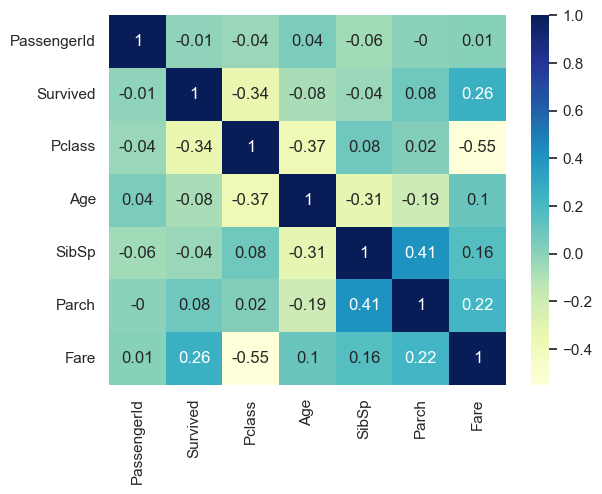

In [4]:
sns.heatmap(df_train.corr().round(2), annot = True, cmap = 'YlGnBu')

plt.show()

In [5]:
df_train['Age'].median()

28.0

Correlations for each categories are weak. The highest R is from Fare and Passenger Class

In [5]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

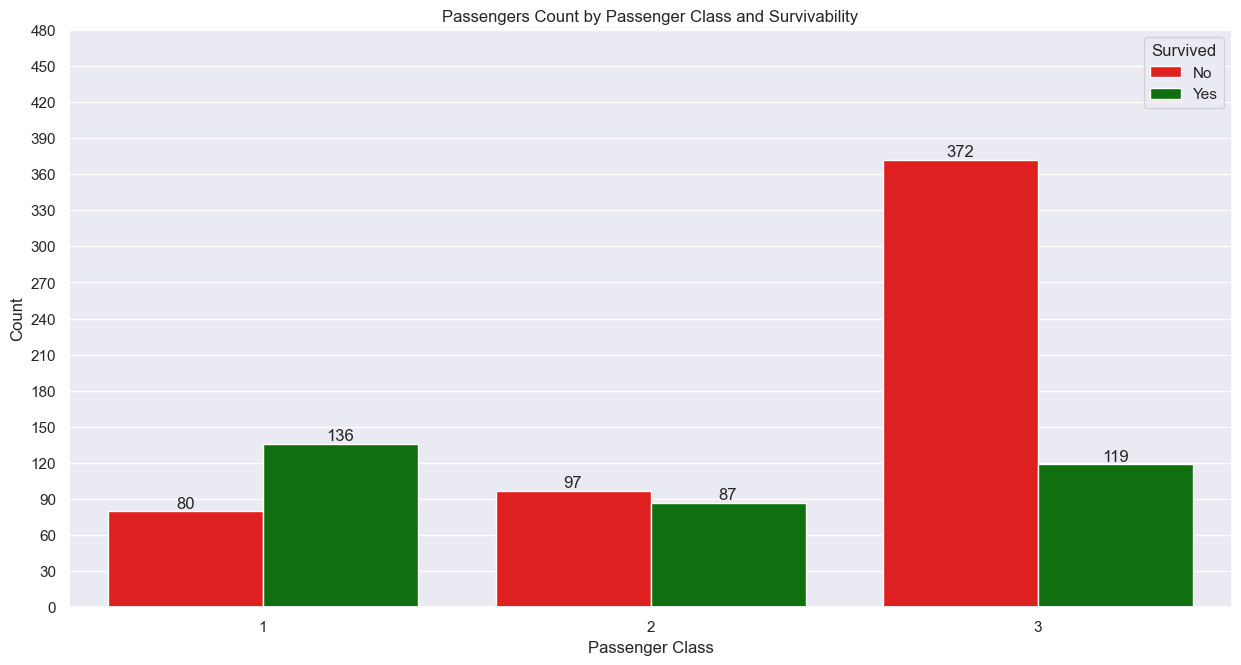

In [6]:
plt.figure(figsize = (15,7.5))

ax = sns.countplot(
    data = df_train,
    x = 'Pclass',
    hue = 'Survived',
    palette = ['red','green']
)
ax.set_ylabel('Count')
ax.set_xlabel('Passenger Class')

for label in ax.containers:
    ax.bar_label(label)

plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.yticks(np.arange(0,500,30))
plt.title('Passengers Count by Passenger Class and Survivability')
plt.show()

Based on the chart, first class passengers have the highest survivability. And third class has the lowest chance of surviving

In [7]:
import missingno as msno

def plot_msno(data, dataset_title):
    """ Visualizing the completeness of the data set using a bar chart. """
    plt.figure(figsize = (10,5))
    msno.bar(data)
    
    plt.title(
        f'{dataset_title} Value Counts Bar Chart',
        fontdict={'fontsize': 25},
        x = 0.5,
        y = 1.15
    )
    plt.show()

In [8]:
df_train['Cabin'] = df_train['Cabin'].str.strip()
df_train['Cabin'] = df_train['Cabin'].str.get(0)

df_train['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

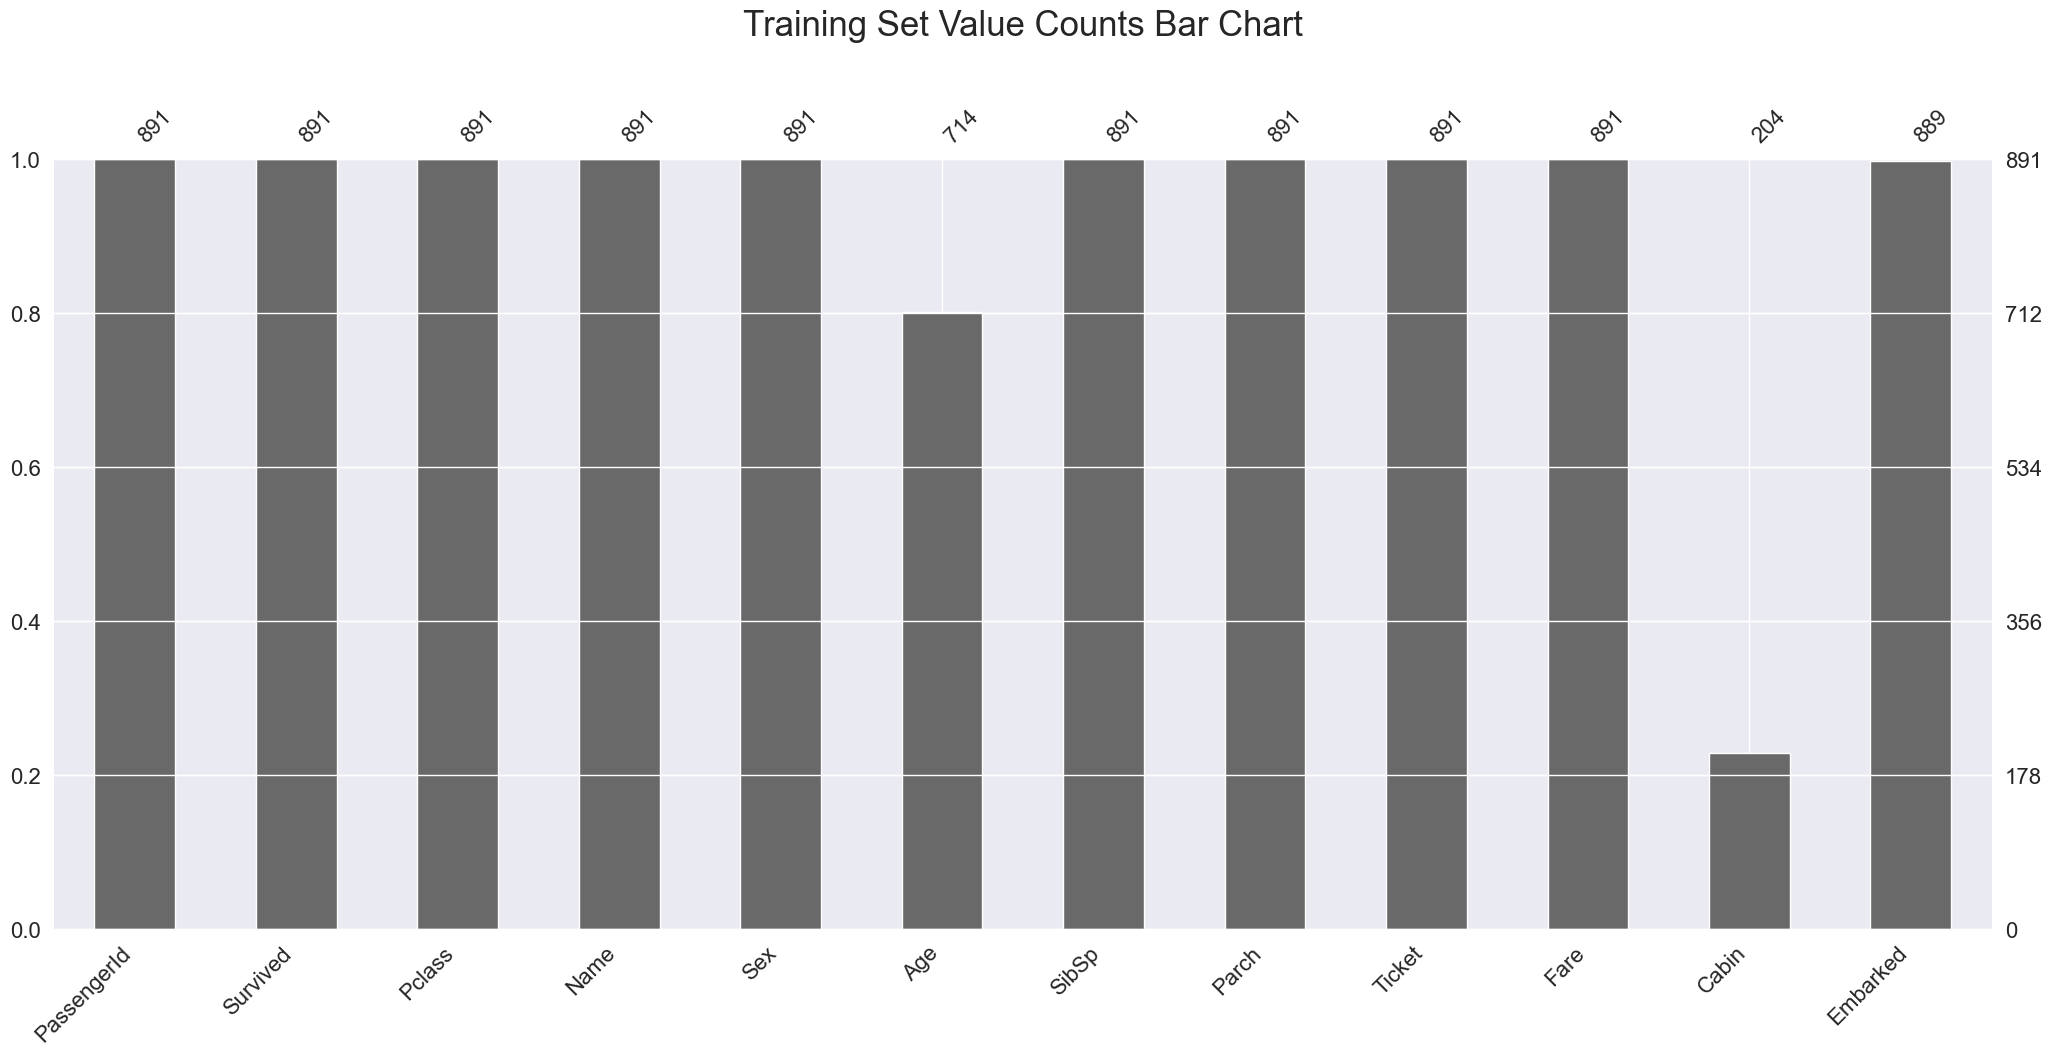

In [9]:
plot_msno(df_train, 'Training Set')

Both Age and Cabin shows problem with the presence of null values. We want to impute this missing values for age with median. Cabin doesn't contribute much so dropping it wouldnt present much problems.

In [10]:
def clean_df(df):
    """ Cleans the dataframe. """
    
    # Dropping irrelevant columns
    df.drop(['Ticket', 'Name'], inplace = True, axis = 1)
    
    # Filling NaN values in Embarked 
    df['Embarked'].fillna(
        'U', #for unknown
        inplace = True
    )
    
    # Imputing NaN values with the median
    df['Age'].fillna(df['Age'].median(), inplace = True)
    
    # Cleaning the Cabin column:
    df['Cabin'] = df_train['Cabin'].str.strip()
    df['Cabin'] = df_train['Cabin'].str.get(0)
    df['Cabin'].fillna('U', inplace = True)

In [11]:
clean_df(df_train)

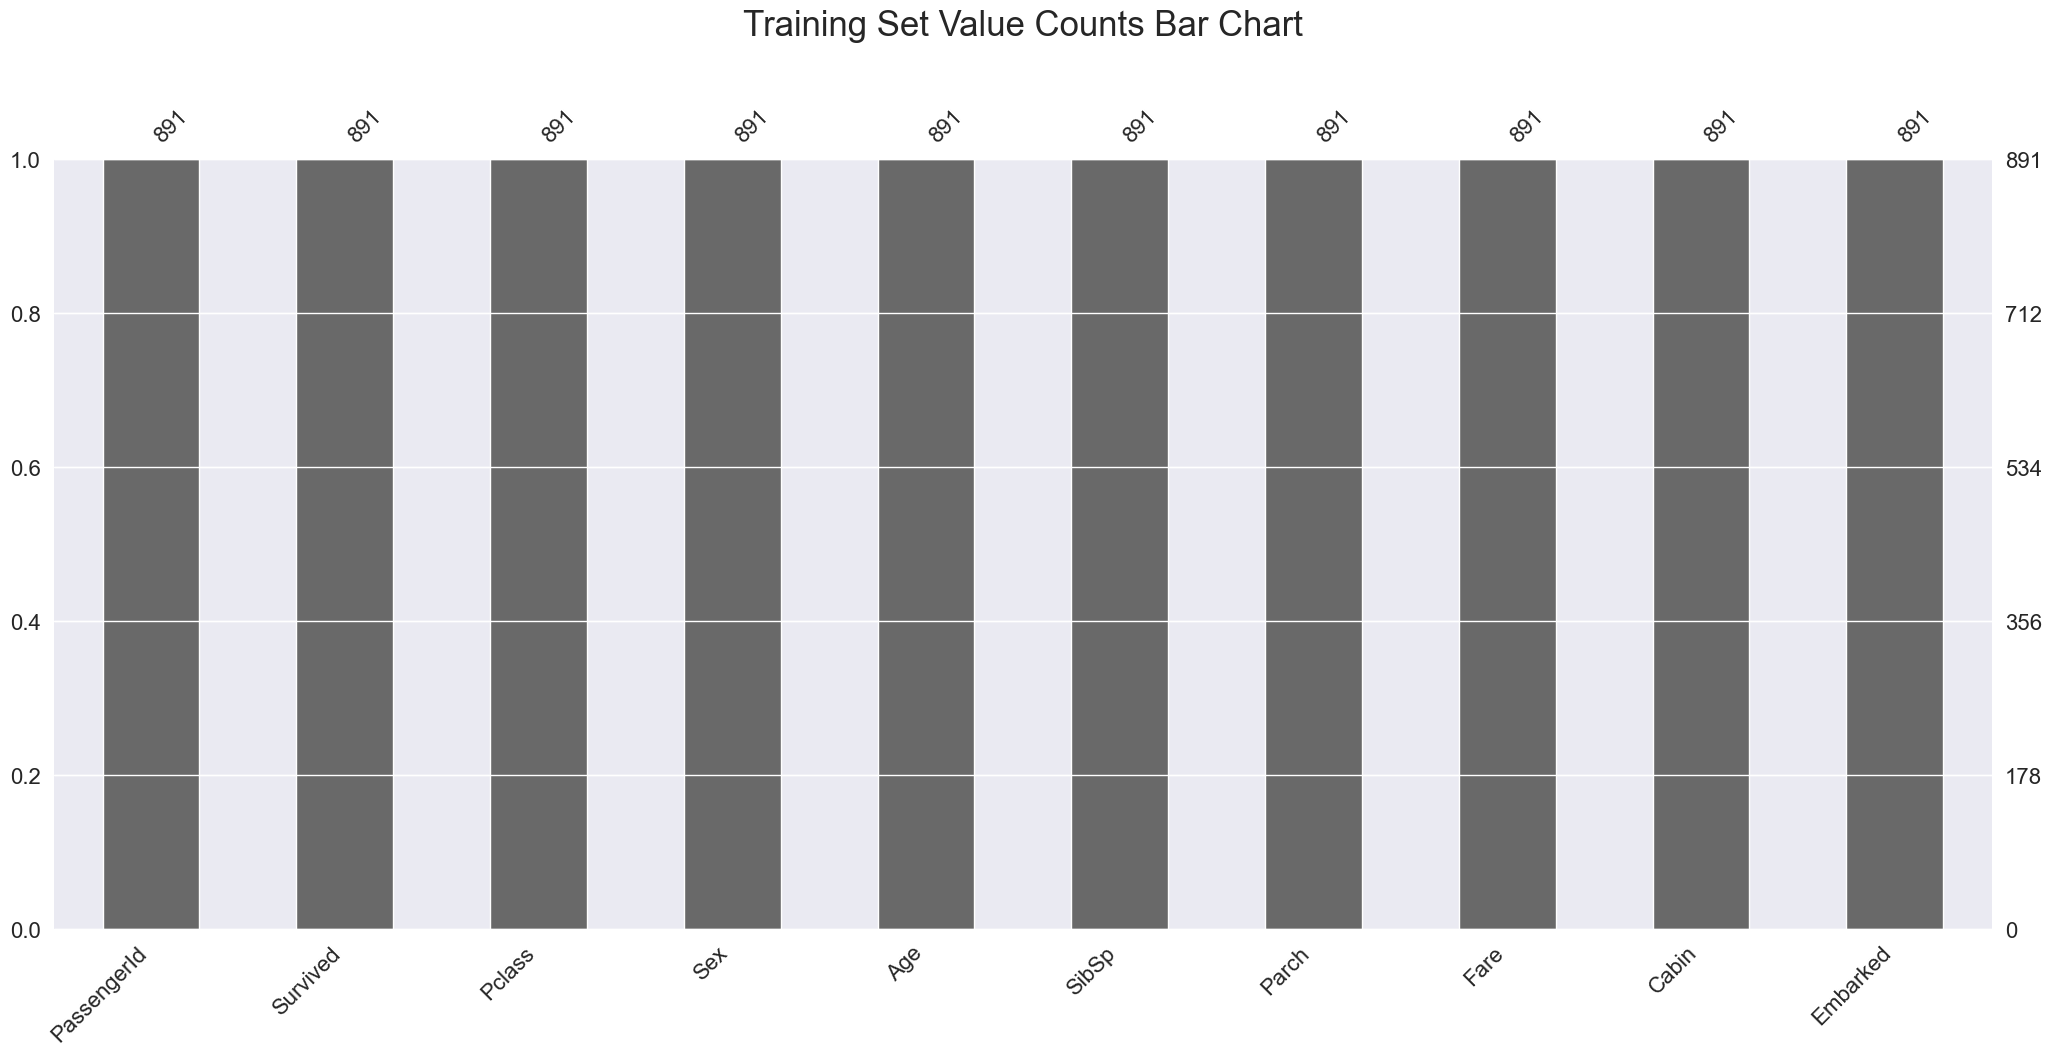

In [12]:
plot_msno(df_train, 'Training Set')

Datasets are now completed

In [13]:
df_train.shape

(891, 10)

Lets get the Survival Rate per Cabin

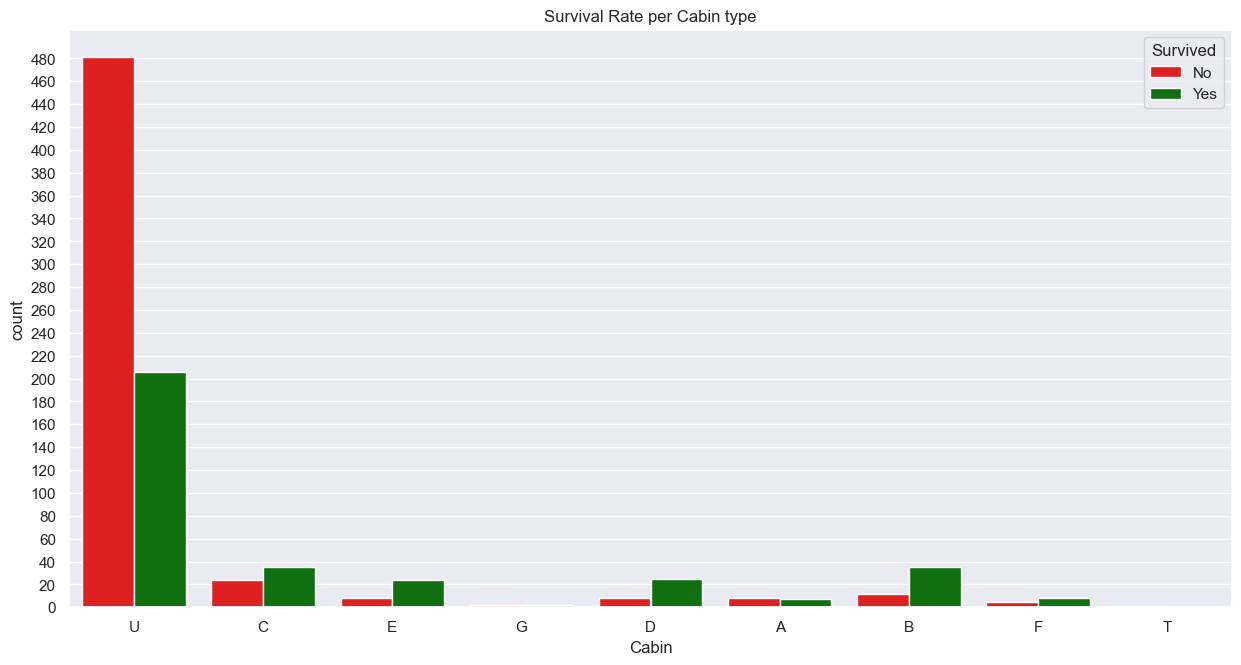

In [14]:
plt.figure(figsize=(15,7.5))

ax = sns.countplot(x = 'Cabin', data = df_train, hue = 'Survived', palette=['red','green'])

plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes']) 
plt.title('Survival Rate per Cabin type')
plt.yticks(np.arange(0,500,20))
plt.show()

Cabin column might be too unreliable for predicting as there are more missing values than the total of the known Cabin Values.

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    object 
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


There are three object types in the data set that needs to be converted into a numeric value so that the model can be trained easily

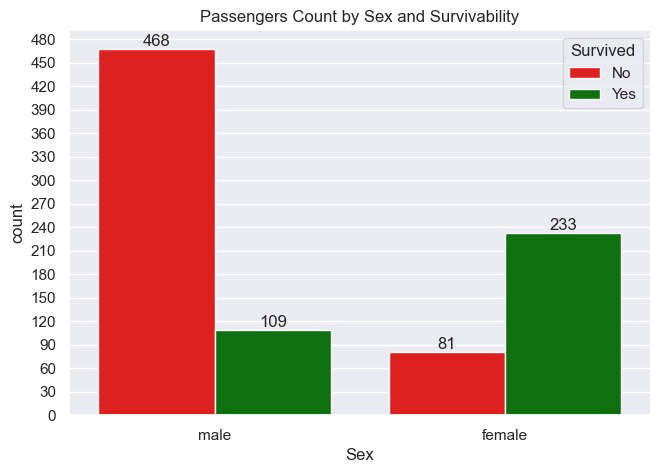

In [16]:
plt.figure(figsize = (7.5,5))

ax = sns.countplot( data = df_train, x = 'Sex', hue = 'Survived', palette = ['red','green'] )

for label in ax.containers: ax.bar_label(label)

plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes']) 

plt.yticks(np.arange(0,500,30))
plt.title('Passengers Count by Sex and Survivability') 
plt.show()


Females noticibly have a higher survival rate than males. 

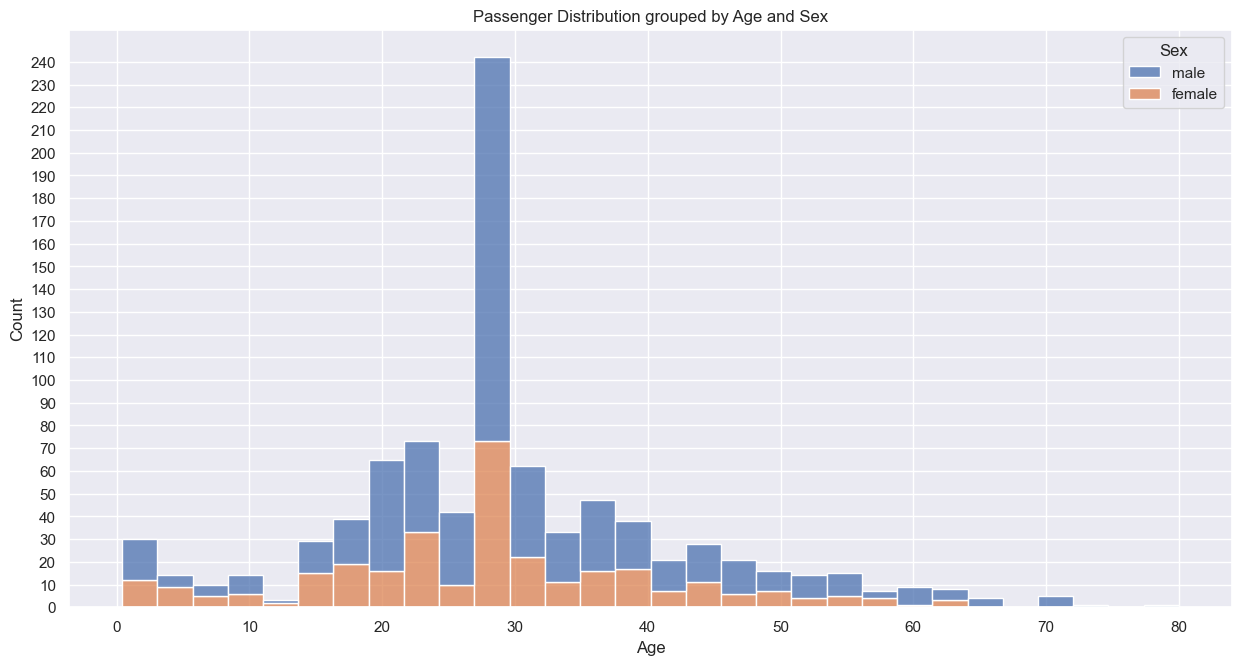

In [17]:
plt.figure(figsize = (15,7.5))

g = sns.histplot(
    x = "Age",
    hue = "Sex",
    data = df_train,
    multiple = 'stack'
)

plt.yticks(np.arange(0,250,10))
plt.title('Passenger Distribution grouped by Age and Sex')
plt.show()

<Figure size 3000x1500 with 0 Axes>

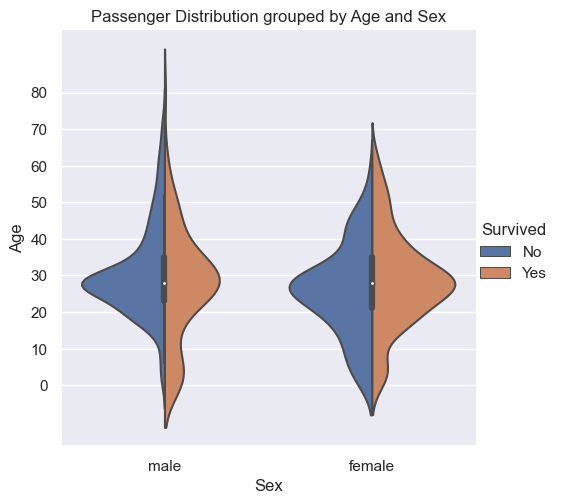

In [18]:
plt.figure(figsize = (30,15))

g = sns.catplot(
    x = "Sex",
    y = "Age",
    hue = "Survived",
    data = df_train,
    kind = "violin",
    split = True,
    facet_kws={'legend_out': True}
)

g._legend.set_title('Survived')

new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

plt.yticks(np.arange(0,90,10))
plt.title('Passenger Distribution grouped by Age and Sex')
plt.show()

Most of the Survivors in the titanic are females by the age or 25 - 30. There is also a noticable area area for males below the age of 10. A lot of male on 25-30 also died. 

This might be due to the fact that women and children are usually the priority when saving people from disasters.

Now we want to separate the training data set and testing data set using stratified sampling, so that the division of data is proportioned.

In [19]:
# Stratified Sampling Based on Survived, Pclass and Sex

from sklearn.model_selection import StratifiedShuffleSplit

def stratified_sampling(df):
    sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.20)
    
    for itrain, itest in sss.split(df, df[['Survived', 'Pclass', 'Sex']]):
        train_df = df.loc[itrain]
        test_df = df.loc[itest] 
                
    return [train_df, test_df]

In [20]:
strat_df_train = stratified_sampling(df_train)[0]
strat_df_test = stratified_sampling(df_train)[1]

In [21]:
strat_df_train.shape, strat_df_test.shape

((712, 10), (179, 10))

Visualizing the datasets if the division is stratified

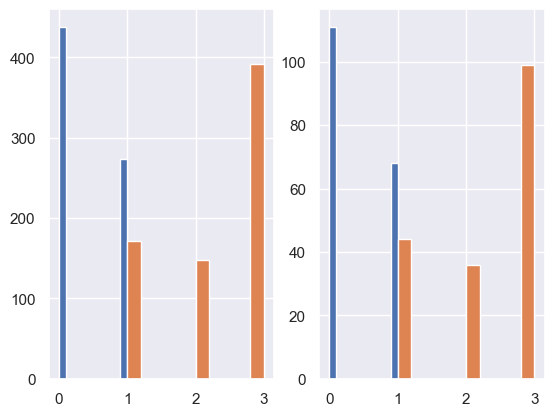

In [22]:

plt.subplot(1,2,1)

strat_df_train['Survived'].hist()
strat_df_train['Pclass'].hist()
plt.subplot(1,2,2)

strat_df_test['Survived'].hist()
strat_df_test['Pclass'].hist()

plt.show()

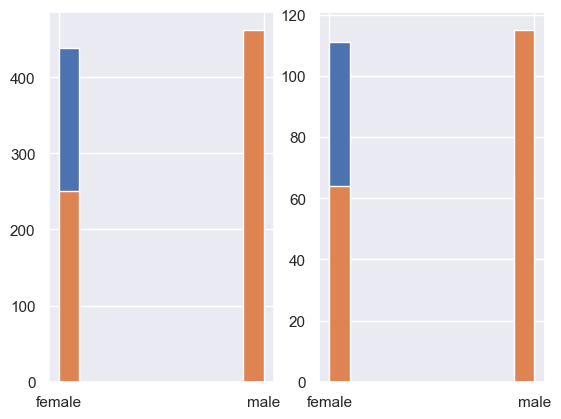

In [23]:
#Visualizing Stratified Data Sets

plt.subplot(1,2,1)

strat_df_train['Survived'].hist()
strat_df_train['Sex'].hist()

plt.subplot(1,2,2)

strat_df_test['Survived'].hist()
strat_df_test['Sex'].hist()

plt.show()

Lets fix this nominal categorical columns by transforming it using one hot encoder:

- Sex
- Embarked 

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
def transform(df):
    """ Transforms the categorical columns to numeric. """
    encoder = OneHotEncoder()
    g_matrix = encoder.fit_transform(df[['Sex']]).toarray()
    e_matrix = encoder.fit_transform(df[['Embarked']]).toarray()
    
    col_sex = ['Male', 'Female']
    for i in range(len(g_matrix.T)):
        df[col_sex[i]] = g_matrix.T[i]
    
    col_embarked = ['Embarked-S', 'Embarked-C', 'Embarked-Q', 'Embarked-U']
    for i in range(len(e_matrix.T)):
        df[col_embarked[i]] = e_matrix.T[i]
    
    if 'Embarked-U' not in df.columns:
        df['Embarked-U'] = 0

    df.drop(['Sex','Embarked', 'Cabin'], inplace = True, axis = 1) #Dropping the Cabin column for unreliability
    
    return df

In [26]:
strat_df_train = transform(strat_df_train)
strat_df_test = transform(strat_df_test)

In [27]:
strat_df_test.shape, strat_df_train.shape

((179, 13), (712, 13))

In [28]:
strat_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 612 to 10
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Age          179 non-null    float64
 4   SibSp        179 non-null    int64  
 5   Parch        179 non-null    int64  
 6   Fare         179 non-null    float64
 7   Male         179 non-null    float64
 8   Female       179 non-null    float64
 9   Embarked-S   179 non-null    float64
 10  Embarked-C   179 non-null    float64
 11  Embarked-Q   179 non-null    float64
 12  Embarked-U   179 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 19.6 KB


In [29]:
strat_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 14 to 279
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Male         712 non-null    float64
 8   Female       712 non-null    float64
 9   Embarked-S   712 non-null    float64
 10  Embarked-C   712 non-null    float64
 11  Embarked-Q   712 non-null    float64
 12  Embarked-U   712 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 77.9 KB


In [30]:
# Training Data Set

X_train = strat_df_train.drop('Survived', axis = 1)
y_train = strat_df_train['Survived']

In [31]:
# Testing Data Set

X_test = strat_df_test.drop('Survived', axis = 1)
y_test = strat_df_test['Survived']

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 12), (712,), (179, 12), (179,))

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 14 to 279
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   Male         712 non-null    float64
 7   Female       712 non-null    float64
 8   Embarked-S   712 non-null    float64
 9   Embarked-C   712 non-null    float64
 10  Embarked-Q   712 non-null    float64
 11  Embarked-U   712 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 72.3 KB


For this problem, Support Vector Machine is selected

In [34]:
# Prediction Using Support Vector Machine Classifier

from sklearn.svm import SVC

clf = SVC(kernel = 'linear')

clf.fit(X_train,y_train)

SVC(kernel='linear')

In [35]:
clf.score(X_train, y_train)

0.797752808988764

In [36]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

Importing the Test Data set and use the model for prediction

In [37]:
df_test = pd.read_csv('test.csv')

In [38]:
clean_df(df_test)

In [39]:
df_test = transform(df_test)

In [40]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [41]:
pred = clf.predict(df_test)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
df_fin = pd.DataFrame(df_test['PassengerId'])
df_fin['Survived'] = pred
df_fin.to_csv('submission.csv', index = False)